In [1]:
from sympy import symbols,init_printing,Derivative,diff,simplify,solve, cos, sin, relational, poly, expand, Matrix, S, Mul, Expr
from sympy.physics.vector import vlatex
from sympy.abc import i,j,k,l,m,n
import numpy as np
import scipy.integrate as integrate
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, Math

init_printing(latex_printer=vlatex, latex_mode='inline')

In [2]:
t = symbols('t')
g = symbols('g')

l = symbols('l0:2')
m = symbols('m0:2')
r = symbols('r0:2')
I = symbols('I0:2')
tau = symbols('tau0:2')
b = symbols('b0:2')

theta = list(w(t) for w in symbols('theta0:2'))
theta_dot = [Derivative(w, t) for w in theta]
theta_ddot = [Derivative(w, t, t) for w in theta]

In [3]:
x = symbols('x0:2')
y = symbols('y0:2')
x_dot = symbols('\dot{x_0:2}')
y_dot = symbols('\dot{y_0:2}')

In [4]:
kinetic = (m[0] * (x_dot[0] ** 2 + y_dot[0] ** 2)
           + m[1] * (x_dot[1] ** 2 + y_dot[1] ** 2)
           + I[0] * (theta_dot[0]               )**2
           + I[1] * (theta_dot[0] + theta_dot[1])**2) / 2
potential = (m[0] * g * y[0]) + (m[1] * g * y[1])
lagrange = kinetic - potential

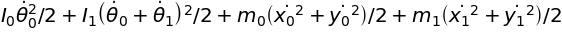

In [5]:
simplify(kinetic)

In [6]:
simplify(potential)

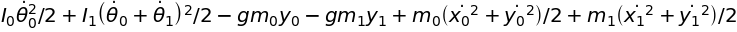

In [7]:
simplify(lagrange)

$$x_0= r_0 \cos{(\theta_0)}$$
$$y_0= r_0 \sin{(\theta_0)}$$
$$x_1= l_0 \cos{(\theta_0)} + r_1 \cos{(\theta_0 + \theta_1)}$$
$$y_1= l_0 \sin{(\theta_0)} + r_1 \sin{(\theta_0 + \theta_1)}$$

$$\dot{x_0}= -r_0 \sin{(\theta_0)}\dot{\theta_0}$$
$$\dot{y_0}= r_0 \cos{(\theta_0)}\dot{\theta_0}$$
$$\dot{x_1}= -(l_0 \sin{(\theta_0)} + r_1 \sin{(\theta_0 + \theta_1)})\dot{\theta_0} - r_1\sin{(\theta_0 + \theta_1)}\dot{\theta_1}$$
$$\dot{y_1}= (l_0 \cos{(\theta_0)} + r_1 \cos{(\theta_0 + \theta_1)})\dot{\theta_0} + r_1\cos{(\theta_0 + \theta_1)}\dot{\theta_1}$$

In [8]:
x = [None] * 2
y = [None] * 2
x_dot = [None] * 2
y_dot = [None] * 2

x[0] = r[0] * cos(theta[0])
y[0] = r[0] * sin(theta[0])
x[1] = l[1] * cos(theta[0]) + r[1] * cos(theta[0] + theta[1])
y[1] = l[1] * sin(theta[0]) + r[1] * sin(theta[0] + theta[1])

x_dot[0] = diff(x[0], t)
y_dot[0] = diff(y[0], t)
x_dot[1] = diff(x[1], t)
y_dot[1] = diff(y[1], t)

In [9]:
kinetic = (m[0] * (x_dot[0] ** 2 + y_dot[0] ** 2)
           + m[1] * (x_dot[1] ** 2 + y_dot[1] ** 2)
           + I[0] * (theta_dot[0]               )**2
           + I[1] * (theta_dot[0] + theta_dot[1])**2) / 2
potential = (m[0] * g * y[0]) + (m[1] * g * y[1])
lagrange = kinetic - potential

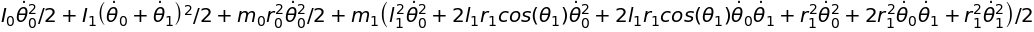

In [10]:
simplify(kinetic)

In [11]:
simplify(potential)

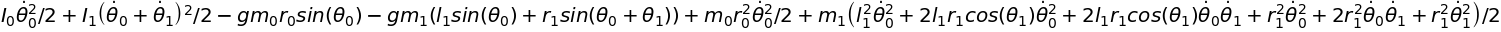

In [12]:
simplify(lagrange)

In [13]:
L_0 = diff(lagrange, theta_dot[0], t) - diff(lagrange, theta[0]) - (tau[0] + b[0]*theta_dot[0])
L_1 = diff(lagrange, theta_dot[1], t) - diff(lagrange, theta[1]) - (tau[1] + b[1]*theta_dot[1])

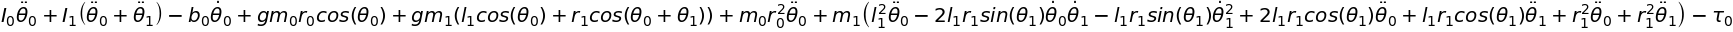

In [14]:
simplify(L_0)

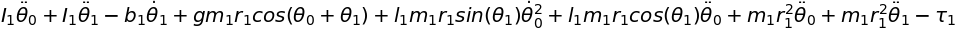

In [15]:
simplify(L_1)

In [16]:
C_1 = simplify(poly(simplify(L_0),theta_ddot).coeffs())
C_2 = simplify(poly(simplify(L_1),theta_ddot).coeffs())

In [17]:
M = Matrix([C_1[0:-1],C_2[0:-1]])
T = Matrix([[theta_ddot[0]],[theta_ddot[1]]])
F = Matrix([C_1[-1],C_2[-1]])

In [18]:
display(Math(vlatex(M)+vlatex(T)+"="+vlatex(F)))

<IPython.core.display.Math object>